# K-Means Clustering
K-Means Clustering merupakan salah satu metode yang dapat digunakan untuk membagi sejumlah objek ke dalam partisi-partisi berdasarkan kategori-kategori yang ada dengan melihat titik tengah yang diberikan. Peng-cluster-an objek dilihat dari jarak objek dengan titik tengah yang paling dekat. Setelah mengetahui titik tengah terdekat, objek tersebut akan diklasifikasikan sebagai anggota dari kategori tersebut.

# Data
Data ini adalah kasus pembelajaran terawasi dengan menggunakan Receiver Operating Characteristic (ROC) untuk memilih set minimal atribut yang mempertahankan atau meningkatkan prediktabilitas data.

Informasi Atribut:

1. D = atribut keputusan (D) dengan nilai 0 (tidak bahagia) dan 1 (bahagia)
2. X1 = ketersediaan informasi tentang layanan kota
3. X2 = biaya perumahan
4. X3 = kualitas keseluruhan sekolah umum
5. X4 = kepercayaan Anda pada polisi setempat
6. X5 = pemeliharaan jalan dan trotoar
7. X6 = ketersediaan acara komunitas sosial

Atribut X1 hingga X6 memiliki nilai 1 hingga 5.

# Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans 

# Membaca Data

In [18]:
survey = pd.read_csv("SomervilleHappinessSurvey2015.csv")
survey.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


# Informasi Data

In [19]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
D     143 non-null int64
X1    143 non-null int64
X2    143 non-null int64
X3    143 non-null int64
X4    143 non-null int64
X5    143 non-null int64
X6    143 non-null int64
dtypes: int64(7)
memory usage: 7.9 KB


In [21]:
survey.describe()

,D,X1,X2,X3,X4,X5,X6
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.538462,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783
std,0.500271,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Persebaran Plot

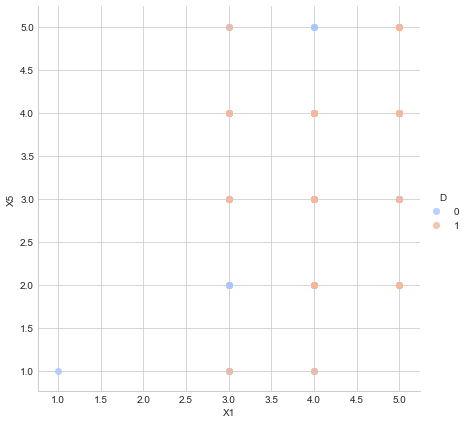

In [23]:
#Sebaran Plot antara X1(ketersediaan informasi tentang layanan kota) dengan X5 (pemeliharaan jalan dan trotoar)
sns.set_style('whitegrid') 
sns.lmplot('X1','X5',data=survey, hue='D',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

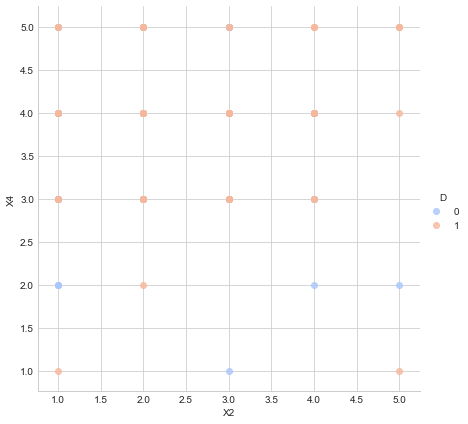

In [24]:
#Sebaran Plot antara X2(biaya perumahan) dengan X4 (kepercayaan Anda pada polisi setempat)
sns.set_style('whitegrid') 
sns.lmplot('X2','X4',data=survey, hue='D',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

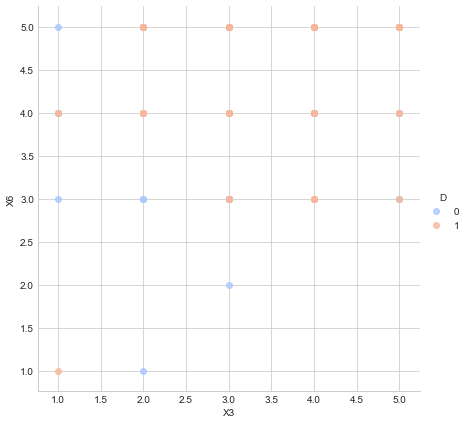

In [25]:
#Sebaran Plot antara X3(kualitas keseluruhan sekolah umum) dengan X6 (ketersediaan acara komunitas sosia)
sns.set_style('whitegrid') 
sns.lmplot('X3','X6',data=survey, hue='D',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

# Histogram

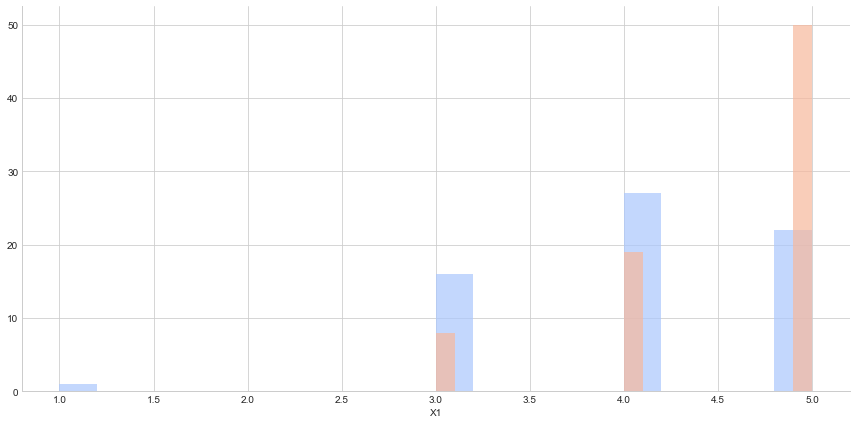

In [34]:
#Histogram antara X1(ketersediaan informasi tentang layanan kota)
sns.set_style('whitegrid')
g = sns.FacetGrid(survey,hue="D",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'X1',bins=20,alpha=0.7)

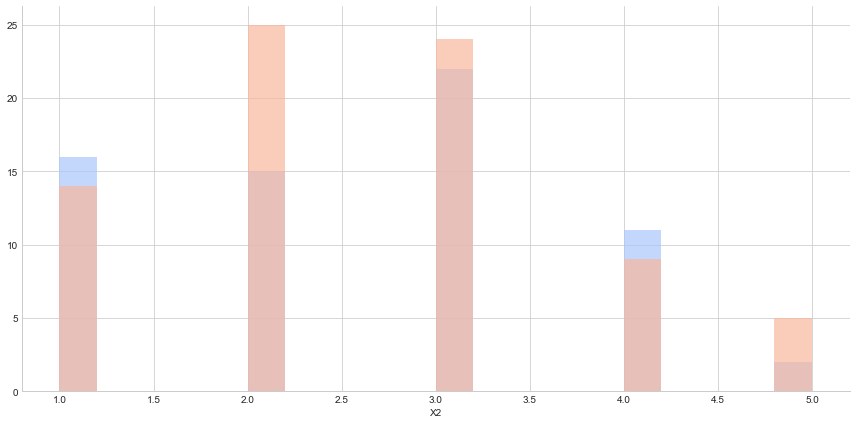

In [35]:
#Histogram antara X2(biaya perumahan)
sns.set_style('whitegrid')
g = sns.FacetGrid(survey,hue="D",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'X2',bins=20,alpha=0.7)

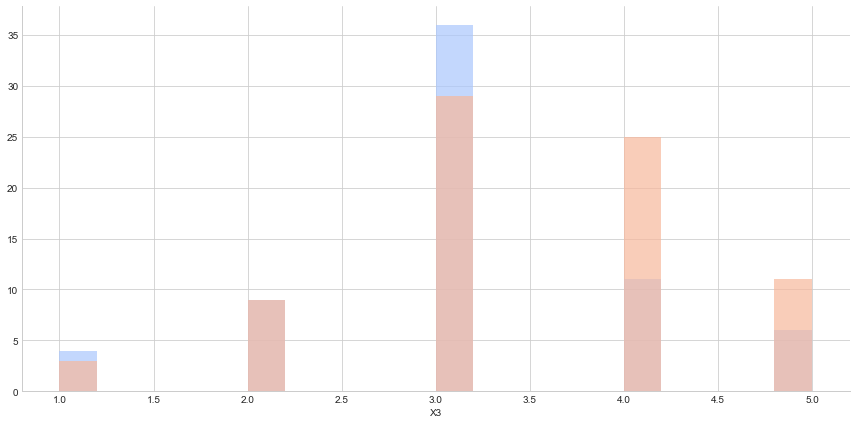

In [36]:
#Histogram antara X3(kualitas keseluruhan sekolah umum)
sns.set_style('whitegrid')
g = sns.FacetGrid(survey,hue="D",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'X3',bins=20,alpha=0.7)

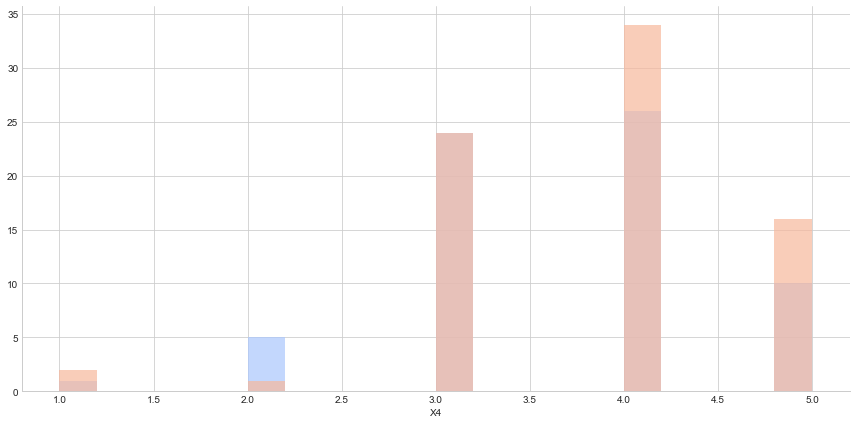

In [37]:
#Histogram antara X4(kepercayaan Anda pada polisi setempat)
sns.set_style('whitegrid')
g = sns.FacetGrid(survey,hue="D",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'X4',bins=20,alpha=0.7)

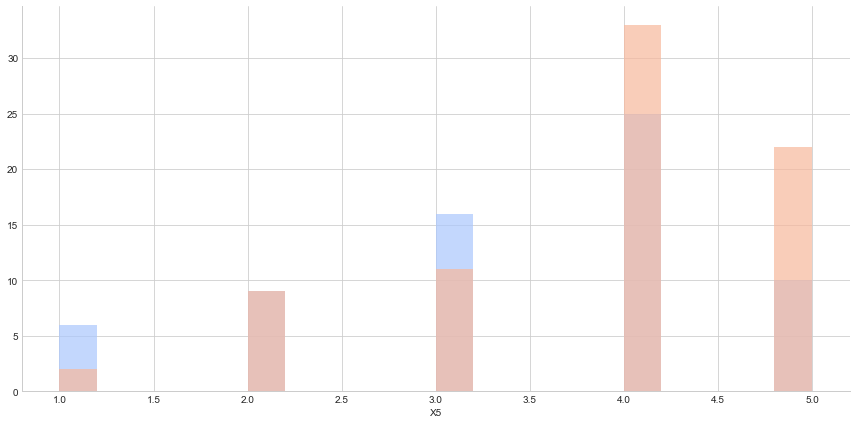

In [38]:
#Histogram antara X5(pemeliharaan jalan dan trotoar)
sns.set_style('whitegrid')
g = sns.FacetGrid(survey,hue="D",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'X5',bins=20,alpha=0.7)

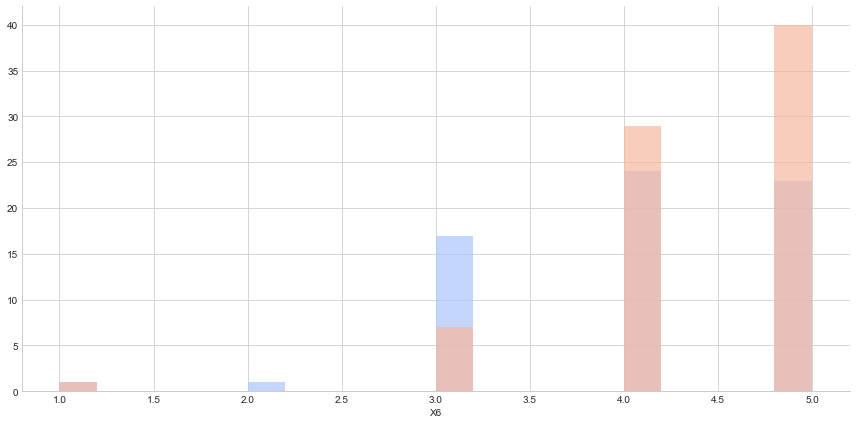

In [39]:
#Histogram antara X6(ketersediaan acara komunitas sosial)
sns.set_style('whitegrid')
g = sns.FacetGrid(survey,hue="D",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'X6',bins=20,alpha=0.7)

# K Means Cluster

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [91]:
# Mengubah variabel data frame menjadi array
x_array =  np.array(survey)
print(x_array)

[[0 0 0 ... 4 0 0]
 [0 0 0 ... 3 0 0]
 [1 0 0 ... 5 0 0]
 ...
 [1 0 0 ... 5 0 0]
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 5 0 0]]


In [93]:
# Menstandarkan ukuran variabel
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

C:\Users\REVATA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.  , 0.  , 0.  , ..., 0.75, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.5 , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       ...,
       [1.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ]])

In [94]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 5, random_state=123)

In [95]:
# Menentukan kluster dari data
kmeans.fit(x_scaled) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [96]:
# Menampilkan pusat cluster
print(kmeans.cluster_centers_)

[[-1.11022302e-16  0.00000000e+00  0.00000000e+00  4.14062500e-01
   0.00000000e+00  0.00000000e+00  6.01562500e-01  0.00000000e+00
   0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  4.08536585e-01
   0.00000000e+00  0.00000000e+00  8.17073171e-01  0.00000000e+00
   0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  8.26388889e-01
   0.00000000e+00  0.00000000e+00  8.81944444e-01  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.11764706e-01
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  8.38235294e-01
   0.00000000e+00  0.00000000e+00  7.94117647e-01  0.00000000e+00
   0.00000000e+00]]


In [97]:
# Menampilkan hasil kluster
print(kmeans.labels_)

[0 0 1 3 3 1 0 2 4 4 0 0 2 4 0 2 4 2 3 4 1 1 4 4 1 1 0 1 1 1 1 0 0 3 2 2 1
 0 2 2 1 1 0 0 2 3 0 1 2 1 0 2 1 1 1 2 2 1 1 3 4 2 2 1 3 2 2 4 1 1 0 0 2 2
 1 1 0 4 1 3 0 2 0 0 1 3 2 1 0 2 1 4 1 1 0 2 3 0 4 1 2 1 2 2 0 2 0 2 1 0 1
 1 0 2 3 2 0 3 2 0 2 4 4 2 2 3 0 0 0 4 3 4 2 2 1 1 4 1 3 1 1 3 3]


In [99]:
# Menambahkan kolom "kluster" dalam data frame ritel
survey["kluster"] = kmeans.labels_

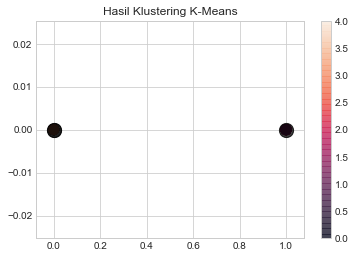

In [101]:
# Memvisualkan hasil kluster
sct = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = survey.kluster, marker = "o", alpha = 0.5, )

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5);

plt.title("Hasil Klustering K-Means")
plt.colorbar (sct)

plt.show()